# Analyze innovator simulations

In [45]:
### Loading in functions and modules required for analysis
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
from functions import *

In [46]:
#names=['case0_f09','case1_f09','case2_f09','case3_f09','case4_f09','case5_f09','case6_f09','case7_f09','case8_f09','case9_f09']
names=['allesaca','cleowe','jessica.moulite','kmartinez5960','mmoulton','skdiko',
       'amy.yeboah','danielsarna','jfirst','ksmiley','monicamo','tbp32',
       'aswatha','joemci','lacey','msaenger','walker'
       'hopson','jtb438','madison.winfield','nathanvaneck8','wc349',
       'caley9198','ejg6','jyevuy1','mallaire','nick1.reynolds','wendyp2',
       'cameron.kennedy','eoughton','kash78','mamende6','sara.meerow','williams.ch',
       'catrin.edgeley','friedmanraquel','j4wan','kelsey.emard','mhhicks','sed265','ytian'
       'cdavis','jajibade','kgmarti1','michee.lachaud','shinwoo.choi11']

### Getting the output files from each person

In [47]:
#files = [glob.glob("/scratch/"+names[i]+"/case*/run/*.cam.h1.*.nc")[0] for i in np.arange(0,len(names),1)]

# for pre-computed cases
files = [glob.glob("/scratch/data/example_simulations/"+names[i]+"/atm/hist/*.cam.h1.*.nc")[0] for i in np.arange(0,len(names),1)]

In [48]:
dat = xr.open_mfdataset(files, combine='nested', concat_dim='student')
dat = dat.assign_coords(student=names)
dat = dat.load()

### Picking out two people's runs to see the difference at different times during the simulation
### Here plotting near surface air temperature

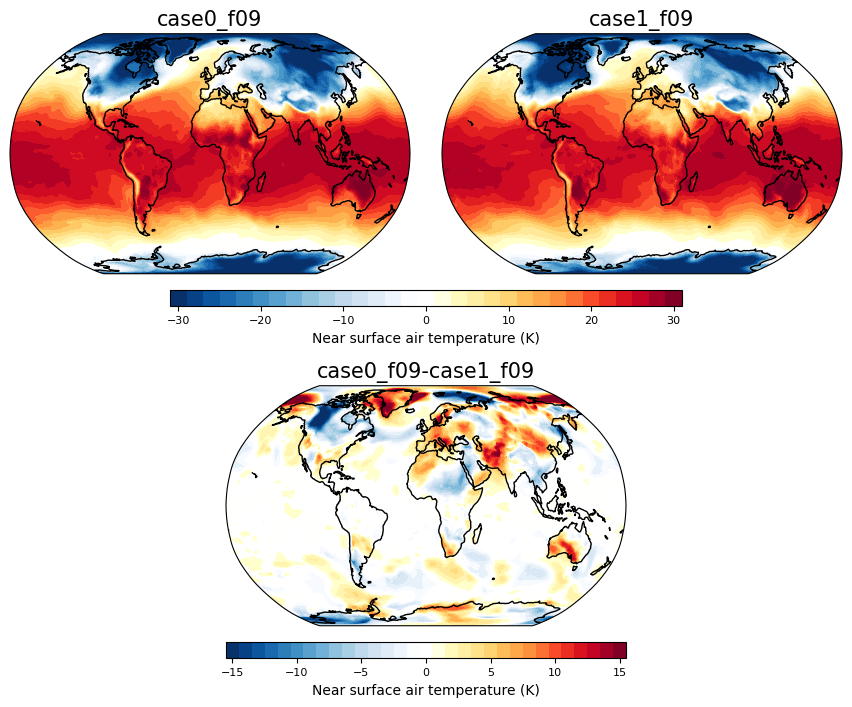

In [50]:
timeplot = 1
person1 = dat.sel(student='case0_f09')
person2 = dat.sel(student='case1_f09')

fig = plt.figure(figsize=(16,16))

ci=2 ; cmax=30

ax = contourmap_bothcontinents_robinson_pos(fig, person1.TREFHT.isel(time=timeplot)-273.15, person1.lon, person1.lat,
                                            2,-30,30,person1.student.values, 0.05,0.3,0.85,1)
ax = contourmap_bothcontinents_robinson_pos(fig, person2.TREFHT.isel(time=timeplot)-273.15, person1.lon, person1.lat,
                                            2,-30,30,person2.student.values, 0.32,0.57,0.85,1)
ax = plotcolorbar(fig, ci, -1*cmax, cmax, 'Near surface air temperature (K)', 
                  0.15,0.47,0.83,0.84, fsize=8)

#----Use contour range -20,20,1 for other days or -0.5,0.5,0.05 to illustrate day 1 
ci=1 ; cmax=15
#ci=0.05 ; cmax=0.5
ax = contourmap_bothcontinents_robinson_pos(fig, person2.TREFHT.isel(time=timeplot) - person1.TREFHT.isel(time=timeplot), person1.lon, person1.lat,
                                            ci,-1*cmax,cmax,str(person1.student.values)+'-'+str(person2.student.values),0.185, 0.185+0.25, 0.63, 0.78)
ax = plotcolorbar(fig, ci, -1*cmax, cmax, 'Near surface air temperature (K)',
                  0.185,0.185+0.25,0.61,0.62, fsize=8)

### Here plotting precipitation

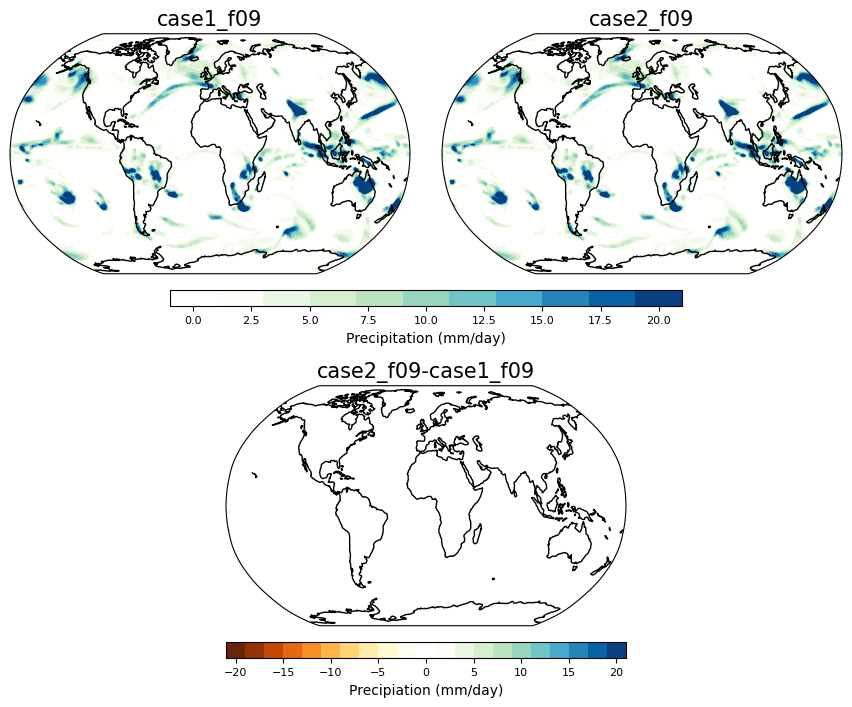

In [51]:
timeplot = 1 
person1 = dat.sel(student='case1_f09')
person2 = dat.sel(student='case2_f09')

fig = plt.figure(figsize=(16,16))

person1_prect = ((person1.PRECC.isel(time=timeplot)) + person1.PRECL.isel(time=timeplot))*86400.*1000.
person2_prect = ((person2.PRECC.isel(time=timeplot)) + person2.PRECL.isel(time=timeplot))*86400.*1000.

ci=2 ; cmax=20

ax = contourmap_bothcontinents_robinson_pos(fig, person1_prect,
                                            person1.lon, person1.lat,ci,-1*cmax,cmax,person1.student.values, 0.05,0.3,0.85,1, cmap='precip')
ax = contourmap_bothcontinents_robinson_pos(fig, person2_prect, 
                                            person2.lon, person2.lat,ci,-1*cmax,cmax,person2.student.values, 0.32,0.57,0.85,1, cmap='precip')
ax = plotcolorbar(fig, ci, -1*cmax, cmax, 'Precipitation (mm/day)',0.15,0.47,0.83,0.84, fsize=8, cmap='precip', posneg='pos')

ax = contourmap_bothcontinents_robinson_pos(fig, person2_prect - person1_prect,  
                                            person1.lon, person1.lat, ci,-1*cmax,cmax,
             str(person2.student.values)+'-'+str(person1.student.values),0.185, 0.185+0.25, 0.63, 0.78, cmap='precip')
ax = plotcolorbar(fig, ci, -1*cmax, cmax, 'Precipiation (mm/day)',
                  0.185,0.185+0.25,0.61,0.62, fsize=8, cmap='precip')


### Summarizing everyone's simulations over Boulder

In [52]:
boulderlon=255 ; boulderlat=40
dat_boulder = dat.sel(lon=boulderlon, lat=boulderlat, method='nearest').load()

#### Near surface air temperature

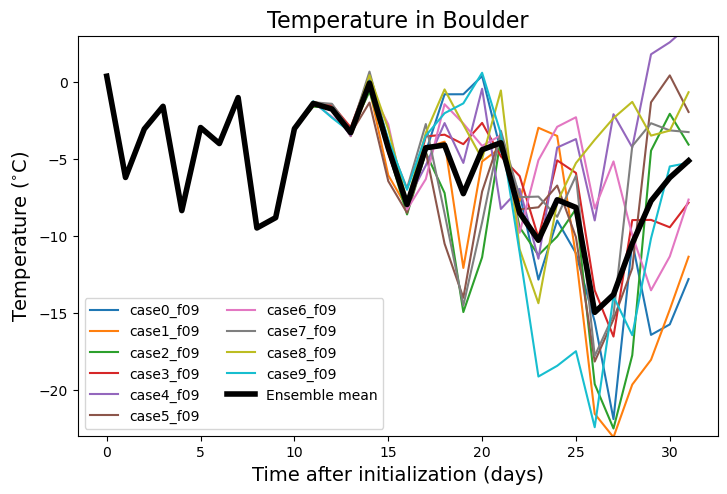

In [53]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_axes([0.05,0.7,0.4,0.25])
ax.set_ylim(-23,3)
ax.set_title('Temperature in Boulder',fontsize=16)
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=14)
ax.set_xlabel('Time after initialization (days)', fontsize=14)

for i in np.arange(0,dat.student.size,1):
    ax.plot(np.arange(0,dat.time.size,1), dat_boulder.TREFHT.isel(student=i)-273.15, label=dat.student.isel(student=i).values)

ax.plot(np.arange(0,dat.time.size,1), dat_boulder.TREFHT.mean('student')-273.15, linewidth=4,
        color='black',label='Ensemble mean')
    
ax.legend(loc='lower left', ncol=2)
    

#### Precipitation

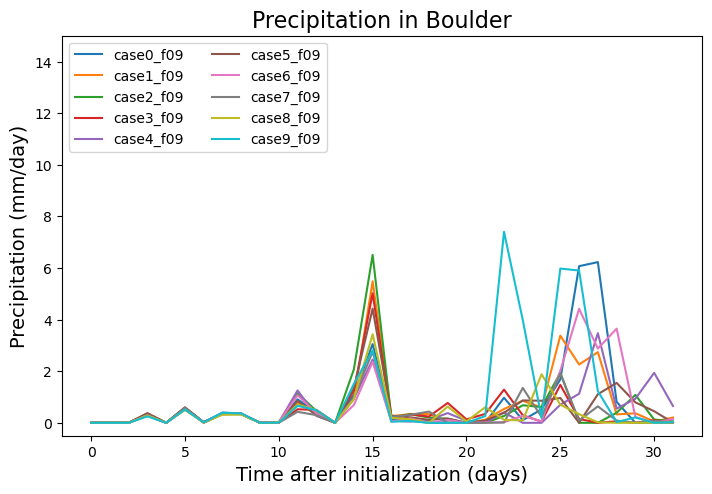

In [55]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_axes([0.05,0.7,0.4,0.25])
ax.set_ylim(-0.5,15)
ax.set_title('Precipitation in Boulder',fontsize=16)
ax.set_ylabel('Precipitation (mm/day)', fontsize=14)
ax.set_xlabel('Time after initialization (days)', fontsize=14)

for i in np.arange(0,dat.student.size,1):
    #ax.plot(np.arange(0,dat.time.size,1), dat_boulder.PRECT.isel(student=i)*86400.*1000., label=dat.student.isel(student=i).values)
    ax.plot(np.arange(0,dat.time.size,1), dat_boulder.PRECC.isel(student=i)*86400.*1000. + dat_boulder.PRECL.isel(student=i)*86400.*1000.,
            label=dat.student.isel(student=i).values)
ax.legend(loc='upper left', ncol=2)
    

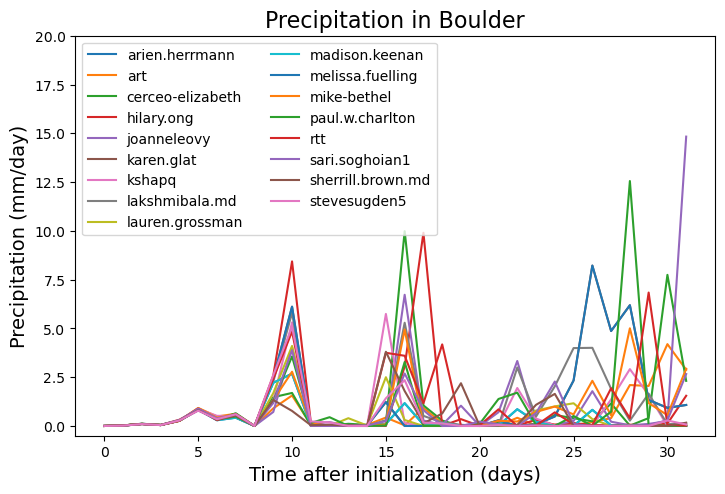

In [221]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_axes([0.05,0.7,0.4,0.25])
ax.set_ylim(-0.5,20)
ax.set_title('Precipitation in Boulder',fontsize=16)
ax.set_ylabel('Precipitation (mm/day)', fontsize=14)
ax.set_xlabel('Time after initialization (days)', fontsize=14)

for i in np.arange(0,dat.student.size,1):
    ax.plot(np.arange(0,dat.time.size,1), dat_boulder.PRECT.isel(student=i)*86400.*1000., label=dat.student.isel(student=i).values)

ax.legend(loc='upper left', ncol=2)
    

# Extra's - Sea level pressure

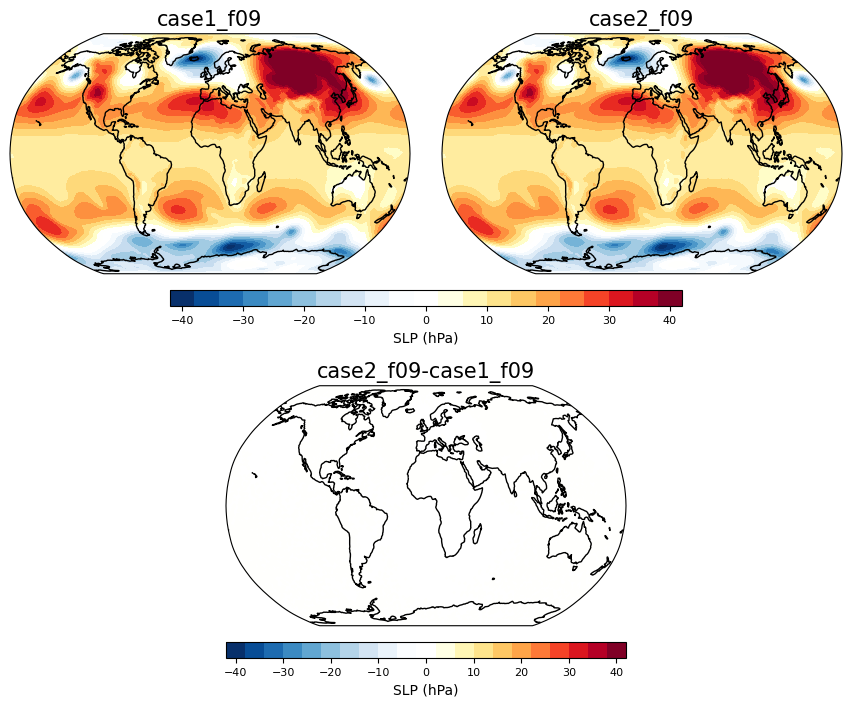

In [59]:
timeplot = 1
person1 = dat.sel(student='case1_f09')
person2 = dat.sel(student='case2_f09')

fig = plt.figure(figsize=(16,16))

ci=4 ; cmax=40


ax = contourmap_bothcontinents_robinson_pos(fig, (person1.PSL.isel(time=timeplot)-1e5)/100., person1.lon, person1.lat, 
                                            ci,-1*cmax,cmax,person1.student.values, 0.05,0.3,0.85,1)

ax = contourmap_bothcontinents_robinson_pos(fig, (person2.PSL.isel(time=timeplot)-1e5)/100., person2.lon, person2.lat, 
                                            ci,-1*cmax,cmax,person2.student.values, 0.32,0.57,0.85,1)

ax = plotcolorbar(fig, ci, -1*cmax, cmax, 'SLP (hPa)', 
                  0.15,0.47,0.83,0.84, fsize=8)

ci=4 ; cmax=40

ax = contourmap_bothcontinents_robinson_pos(fig, ((person2.PSL.isel(time=timeplot) - person1.PSL.isel(time=timeplot)))/100., person1.lon, person1.lat, 
                                            ci,-1*cmax,cmax, str(person2.student.values)+'-'+str(person1.student.values),0.185, 0.185+0.25, 0.63, 0.78)

ax = plotcolorbar(fig, ci, -1*cmax, cmax, 'SLP (hPa)',
                  0.185,0.185+0.25,0.61,0.62, fsize=8)
